<a href="https://colab.research.google.com/github/maedeamooshahi/big2/blob/main/prozhe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Label
0,5331-RGMTT,Male,1.0,Yes,No,54.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.05,5295.70,No
1,5161-XEUVX,Male,0.0,Yes,No,37.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,94.30,3460.95,No
2,0336-PIKEI,Male,1.0,Yes,No,72.0,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),74.40,5360.75,No
3,3345-PBBFH,Male,0.0,Yes,No,8.0,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.55,393.45,No
4,5067-XJQFU,Male,1.0,Yes,Yes,66.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No


In [4]:
list_convert=[]
for col in df.columns:
    if len(set(df[col]))<5 and 'Yes' in set(df[col]):
        list_convert.append(col)
list_convert

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Label']

In [5]:
def converter(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0
    elif type(x)!=float:
        return 0.5
    else: return x
for colName in list_convert:
    df[colName]=df[colName].apply(converter)

import numpy as np

In [6]:
df.isnull().sum()

customerID          34
gender              48
SeniorCitizen       48
Partner             47
Dependents          48
tenure              41
PhoneService        41
MultipleLines       53
InternetService     41
OnlineSecurity      43
OnlineBackup        49
DeviceProtection    49
TechSupport         52
StreamingTV         45
StreamingMovies     46
Contract            46
PaperlessBilling    46
PaymentMethod       51
MonthlyCharges      48
TotalCharges        51
Label               36
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44257 entries, 0 to 44256
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        44223 non-null  object 
 1   gender            44209 non-null  object 
 2   SeniorCitizen     44209 non-null  float64
 3   Partner           44210 non-null  float64
 4   Dependents        44209 non-null  float64
 5   tenure            44216 non-null  float64
 6   PhoneService      44216 non-null  float64
 7   MultipleLines     44204 non-null  float64
 8   InternetService   44216 non-null  object 
 9   OnlineSecurity    44214 non-null  float64
 10  OnlineBackup      44208 non-null  float64
 11  DeviceProtection  44208 non-null  float64
 12  TechSupport       44205 non-null  float64
 13  StreamingTV       44212 non-null  float64
 14  StreamingMovies   44211 non-null  float64
 15  Contract          44211 non-null  object 
 16  PaperlessBilling  44211 non-null  float6

### filling missing values 

object types-->bfill,ffil

numeric-->KNNimputer

In [8]:
from sklearn.impute import KNNImputer
for col in df.columns:
    if df[col].dtype!='O':
        imputer=KNNImputer()
        df[col]=imputer.fit_transform(df[[col]])

In [9]:
df.isnull().sum()

customerID          34
gender              48
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService     41
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract            46
PaperlessBilling     0
PaymentMethod       51
MonthlyCharges       0
TotalCharges         0
Label                0
dtype: int64

In [10]:
df.fillna(method='bfill',inplace=True)

In [11]:
df.isnull().sum().sum()

0

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

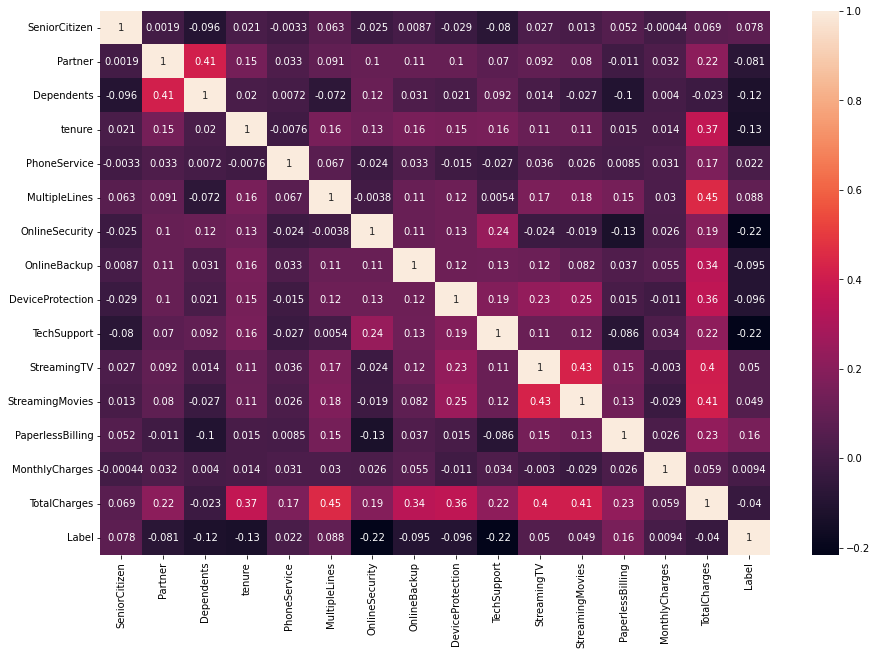

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Label
count,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000,44257.000000
mean,0.212445,0.628840,0.357077,49.474579,0.903700,0.595240,0.501606,0.572600,0.575722,0.500486,0.589670,0.597691,0.598132,130.770147,3697.171917,0.146899
std,0.872559,0.482864,0.478883,35.767288,0.294869,0.465444,0.445928,0.439969,0.439456,0.445924,0.436812,0.435110,0.490026,888.482831,2329.229223,0.353865
min,0.000000,0.000000,0.000000,-594.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.850000,0.000000
25%,0.000000,0.000000,0.000000,37.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.050000,1502.250000,0.000000
50%,0.000000,1.000000,0.000000,56.000000,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,79.100000,3527.000000,0.000000
75%,0.000000,1.000000,1.000000,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,97.100000,5673.700000,0.000000
max,17.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14990.000000,8684.800000,1.000000


######  MonthlyCharges and TotalCharges columns have some outliers and we shood handle this issue and citizenSenior columns have many bad data so we should drop this column

In [15]:
df.drop('SeniorCitizen',axis=1,inplace=True)

In [16]:
def outlier_finder(df):
    index_list=[]
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    higher_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    index_list.extend((df[(df<lower_bound) | (df>higher_bound)]).index)
    return index_list

In [17]:
list_index=[]
for col in ['MonthlyCharges','TotalCharges','tenure']:
    list_index.extend(outlier_finder(df[col]))
len(list_index)

317

In [18]:
df.drop(list_index,inplace=True)

In [19]:
colNoneObject=df.drop(['customerID','gender','InternetService','Contract','PaymentMethod'],axis=1).columns
colNumericsVar=[df[x].var() for x in colNoneObject]

In [20]:
varPerCol=dict(zip(colNoneObject,colNumericsVar))
varPerCol

{'Dependents': 0.2289757984024327,
 'DeviceProtection': 0.192848063125888,
 'Label': 0.12526078096757043,
 'MonthlyCharges': 977.9680800116575,
 'MultipleLines': 0.21643822504213484,
 'OnlineBackup': 0.19359706989566133,
 'OnlineSecurity': 0.19865012857243575,
 'PaperlessBilling': 0.2401078761104192,
 'Partner': 0.23348660768117044,
 'PhoneService': 0.08750753794739978,
 'StreamingMovies': 0.1888752334697289,
 'StreamingTV': 0.190521153203349,
 'TechSupport': 0.1986447090950293,
 'TotalCharges': 5414971.083683757,
 'tenure': 366.5178538672205}

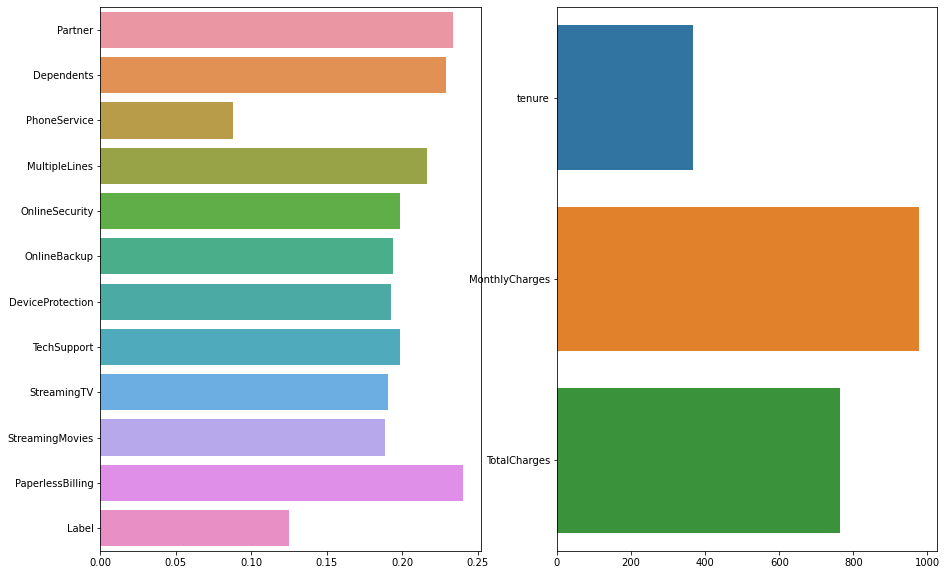

In [21]:
fig,axs=plt.subplots(1,2,figsize=(15,10))
sns.barplot(y=[x for x in varPerCol.keys() if x not in ['tenure','MonthlyCharges','TotalCharges']],
            x=[x for x in varPerCol.values() if x<1],ax=axs[0])

sns.barplot(y=[x for x in varPerCol.keys() if x in ['tenure','MonthlyCharges','TotalCharges']],
            x=[x%978 for x in varPerCol.values() if x>1],ax=axs[1])

##### columns that have low varience have low data for us so we dont need them

In [22]:
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Label
0,5331-RGMTT,Male,1.0,0.0,54.0,1.0,1.0,Fiber optic,0.0,0.0,1.0,0.0,1.0,1.0,Month-to-month,1.0,Credit card (automatic),99.05,5295.70,0.0
1,5161-XEUVX,Male,1.0,0.0,37.0,1.0,1.0,Fiber optic,0.0,0.0,1.0,1.0,1.0,0.0,Two year,0.0,Mailed check,94.30,3460.95,0.0
2,0336-PIKEI,Male,1.0,0.0,72.0,1.0,0.0,DSL,1.0,1.0,1.0,1.0,1.0,0.0,Two year,0.0,Bank transfer (automatic),74.40,5360.75,0.0
3,3345-PBBFH,Male,1.0,0.0,8.0,1.0,0.0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Bank transfer (automatic),49.55,393.45,0.0
4,5067-XJQFU,Male,1.0,1.0,66.0,1.0,1.0,Fiber optic,0.0,1.0,1.0,1.0,1.0,1.0,One year,1.0,Electronic check,108.45,7076.35,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


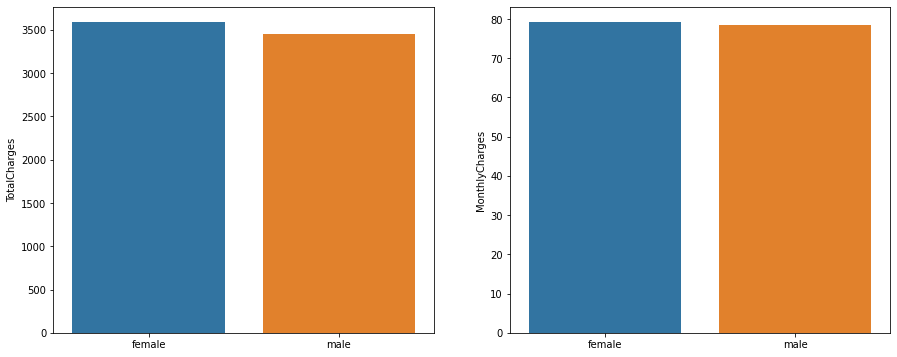

In [23]:
fig,axs=plt.subplots(1,2,figsize=(15,6))
sns.barplot(['female','male'],df.groupby('gender').median()['TotalCharges'],ax=axs[0])
sns.barplot(['female','male'],df.groupby('gender').median()['MonthlyCharges'],
            ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


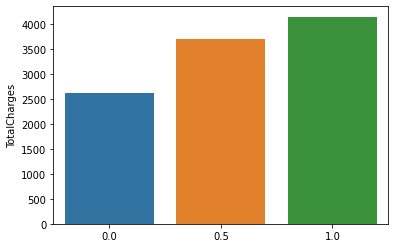

In [24]:
sns.barplot([0,0.5,1],
            df.groupby(['gender',
                        'Partner']).median().reset_index().groupby('Partner').median()['TotalCharges'])

##### observing this plot teach us that partner feature is important  because have positive correlation with pay Charges

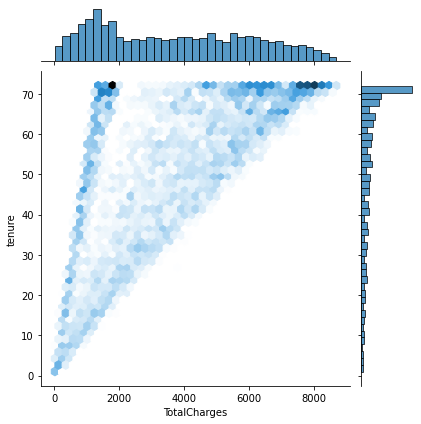

In [25]:
sns.jointplot(data=df,x='TotalCharges',y='tenure',kind='hex')

In [26]:
# sns.swarmplot(data=df,x='Label',y='tenure')

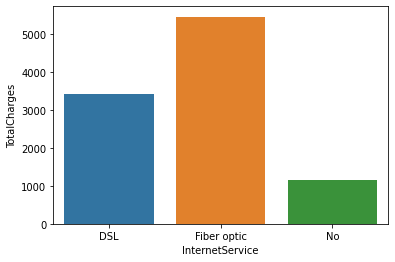

In [27]:
sns.barplot(data=df.groupby('InternetService').median().reset_index(),
           x='InternetService',y='TotalCharges')

In [28]:
df.drop('customerID',axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import OrdinalEncoder
Ord=OrdinalEncoder()
for col in df.columns:
    if df[col].dtype=='O':
        df[col]=Ord.fit_transform(df[[col]])

In [30]:
df.Label.value_counts()

0.000000    37452
1.000000     6452
0.146899       36
Name: Label, dtype: int64

In [31]:
df.drop(df[(df['Label']<1) & (df['Label']>0)].index,inplace=True)

In [32]:
from sklearn import feature_selection as fs
x=df.drop('Label',axis=1)
y=np.array(df['Label']).flatten()

In [33]:
Vr=fs.VarianceThreshold(0.7*(1-0.7))
Vr.fit(x).get_feature_names_out()

array(['gender', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

In [34]:
sf=fs.SelectFpr(fs.chi2,alpha=0.01)
# select by false positive rate
sf.fit(x,y)
sf.get_feature_names_out()

array(['Partner', 'Dependents', 'tenure', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'], dtype=object)

In [35]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1)
model.fit(x,y)
columns_rate=model.feature_importances_
columns_rate

array([0.02864082, 0.02634544, 0.02294841, 0.1675069 , 0.00419421,
       0.02185451, 0.02038499, 0.0345669 , 0.02428736, 0.02431005,
       0.03743079, 0.01840606, 0.01868574, 0.08052047, 0.02479767,
       0.05456393, 0.19622186, 0.19433389])

In [ ]:
list_index_nondrop=[]
for indx,i in enumerate(columns_rate):
    if i>0.03:
        list_index_nondrop.append(indx)
list_index_nondrop

[3, 7, 10, 13, 15, 16, 17]

In [ ]:
def predict_power(model,df,target,r):
    from itertools import combinations
    from numpy import mean
    from sklearn.model_selection import cross_val_score
    if r==1:
        score= [(mean(cross_val_score(model,df[[x]],target,n_jobs=-1))).round(2) for x in df.columns]
        dict_scores=dict(zip(df.columns,score))
        return dict_scores
    elif r>1:
        for i in combinations(df.columns,r):
            res=(mean(cross_val_score(model,df[list(i)],target,n_jobs=-1))).round(2)
            print(f'{i}--->{res}')
        return 'end'

In [ ]:
predict_power(RandomForestClassifier(n_jobs=-1),
             x,y,1)

{'gender': 0.85,
 'Partner': 0.85,
 'Dependents': 0.85,
 'tenure': 0.85,
 'PhoneService': 0.85,
 'MultipleLines': 0.85,
 'InternetService': 0.85,
 'OnlineSecurity': 0.85,
 'OnlineBackup': 0.85,
 'DeviceProtection': 0.85,
 'TechSupport': 0.85,
 'StreamingTV': 0.85,
 'StreamingMovies': 0.85,
 'Contract': 0.85,
 'PaperlessBilling': 0.85,
 'PaymentMethod': 0.85,
 'MonthlyCharges': 0.88,
 'TotalCharges': 0.99}

In [ ]:
list_index_nondrop

[3, 7, 10, 13, 15, 16, 17]

In [ ]:
X=x[x.columns[list_index_nondrop]]

###### با استفاده از این قابلیت فیچر های مورد نیاز رو نگه داشتیم

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xvalid,ytrain,yvalid=train_test_split(X,y,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypre=model.predict(xvalid)

C:\Users\vai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

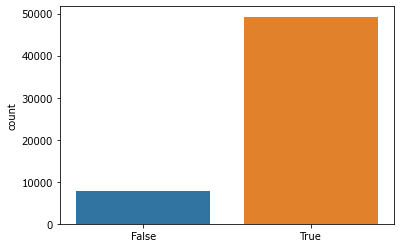

In [ ]:
sns.countplot(ypre==yvalid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid,ypre))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     48588
         1.0       0.61      0.22      0.32      8458

    accuracy                           0.86     57046
   macro avg       0.74      0.60      0.62     57046
weighted avg       0.84      0.86      0.83     57046



در کلاس صفر به دلیل وجود دیتای کافی دقت مناسبی داشتیم ولی به دلیل وجود دیتای کمتردر کلاس یک دقت خوبی کسب نکردیم که باید با تکنینک های بالانس سازی انرا بهبود ببخشیم